In [1]:
import numpy as np
from datascience import * 
%matplotlib inline 
# is a magic command... 
import matplotlib.pyplot as plots # This is the package that uses plots.
plots.style.use('fivethirtyeight') #This is a plot style, a blog based off of the 538 blog.
import warnings # pinkish box warning...
warnings.simplefilter(action="ignore", category=FutureWarning) #This line tells the program to ignore those.


#### 1)Use basic Python operators to find the number of seconds in the month of June. Find the number of seconds that have lapsed between 1 June at noon and 14 Aug, 9:30 AM. 


In [2]:
# Solution using BASIC math operators:
30*24*60*60 # for number of seconds in June
# Now for number of seconds since June 1 at noon to 14 Aug 0930.
((29*24)+(12)*60*60)+(31*24*60*60)+(13*24+(9.5)*60*60) #29 days in June+June 1st at noon+Month of July+13 days in August+9.5hrs Aug14th

2756808.0

### 2)	Import a table (‘world_population.csv’) and find: 
#### a.	The population in 2015 (the dataset begins at 1950). 
#### b.	The population growth between 1950 and 2015. 
#### c.	The average annual growth rate over the course of the dataset.


In [3]:
from datascience import Table #Take Table module from the datascience package

WorldPopulation=Table.read_table('./Data/world_population.csv') 
#Read the data. For me I put the data into a separate sub folder from that of my Jupyter notebooks so that's why it looks weird.

#So, before finding the population in 2015, let's see what it looks like for 1950, noting that python indexs at 0:
print(WorldPopulation.take(0)) #This is therefore population at 1950 for the 2nd entry in the csv file...
print('World population at 2015 is', WorldPopulation.take(2015-1950)) #This draws the specific line to be 2015. That is, 2015-1950=65. So, note that 
#because the file has a title at row 1, and then begins printing population numbers at 2, indexing at 65 will give us the 67th
# entry within the table. 

Population
2557628654
World population at 2015 is Population
7256490011


In [4]:
pop2015=max(WorldPopulation.column('Population'))
pop1950=min(WorldPopulation.column('Population'))
#Average annual growth rate
AvgAnnualGrowthRate=(pop2015/pop1950) ** (1/(2015-1950)) - 1 #Formula from Chapter 3.2.1 from inferential thinking 
print('Average annual growth rate is:',AvgAnnualGrowthRate) #prints out the output.

Average annual growth rate is: 0.01617270380658975


### 3)	The ‘Titanic’ dataset describes passengers on the Titanic when it sank. Url:  https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv. Information about this dataset can be found at a kaggle site (https://www.kaggle.com/c/titanic). Import this dataset and answer the following questions: 
#### a.	Relabel the ‘Pclass’ column to ‘passenger_class’. 
#### b.	Create a new column ‘family_size’ that adds the number of siblings/spouses, ‘SibSp’, to the number of children, ‘Parch’. 
#### c.	Create a barplot of number of passengers, broken down by passenger class. HINT: you will need to use the group method on the dataset; for more info, see the datascience package help.  
#### d.	Sort the data by age and show the youngest 5 passengers. 
#### e.	Now sort by age from oldest to youngest and show the oldest 5 passengers. What did you notice? Eliminate these “nan” values and try again.
#### f.	Find the survival rate for passengers of the Titanic, broken down by passenger class. (HINT: select the columns you care about and then apply the group method, summarizing with the mean.) 
#### g.	Now that you have some familiarity with the dataset, create two of your own questions and answer them.

In [5]:
Passengers= Table.read_table('https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv')
Passengers.show(2) #show the first 2 rows of the table just to see them

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C


In [6]:
#a)Relabel the ‘Pclass’ column to ‘passenger_class’.
Passengers=Passengers.relabel('Pclass','passenger_class')
Passengers.show(2)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C


In [7]:
#b. Create a new column ‘family_size’ that adds the number of siblings/spouses, ‘SibSp’, to the number of children, ‘Parch’.
Passengers=Passengers.with_column('family_size',Passengers['SibSp']+Passengers['Parch'])
Passengers.take[8:12] #This is to demonstrate the function above properly added SibSp and Parch

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S,2
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S,0


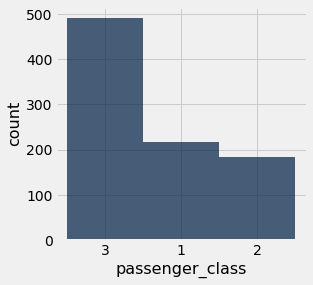

In [8]:
#c. Create a barplot of number of passengers, broken down by passenger class. 
#HINT: you will need to use the group method on the dataset; for more info, see the datascience package help.
Passengers_Sorted=Passengers.sort('passenger_class',descending = True) #Creating a new variable name so we can use it easily
PassengerclassFreq=Passengers_Sorted.group('passenger_class')
#So the group function above, it allows us to determine the "groups" in the passenger_class category and their frequency.
#That is, we now have the amount of times a distinct value appears in the table and all types of distinct value
PassengerclassFreq.sort('count',descending=True).bar('passenger_class','count',overlay=False,width=4,align='edge')

In [9]:
#d. Sort the data by age and show the youngest 5 passengers.
Youngest_Passengers_Sorted=Passengers.sort('Age')
Youngest_Passengers_Sorted.show(5) #This shows that the youngest 5 passengers are all under the age of 1.

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


In [10]:
#e. Now sort by age from oldest to youngest and show the oldest 5 passengers. What did you notice?
#Eliminate these “nan” values and try again.
Oldest_Passengers_Sorted=Passengers.sort('Age',descending=True)
Oldest_Passengers_Sorted=Oldest_Passengers_Sorted.where('Age',are.above(0)) #Are above 0? Yes, so we decided to add a 
# conditional statement in order to prevent 'nan' (not a number) and state we are looking at ages above 0. 
Oldest_Passengers_Sorted.show(5) #Shows up the first 5 rows. Looks like olders person was 80.
max(Oldest_Passengers_Sorted.column('Age')) #This is just an additional check to ensure that yes, the oldest person was 80.

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


80.0

In [11]:
#f. Find the survival rate for passengers of the Titanic, broken down by passenger class. 
#(HINT: select the columns you care about and then apply the group method, summarizing with the mean.)
Survival_of_the_fittest=Passengers.select(['Survived','passenger_class']) #Breaks down to see those who didn't survive and those who did, 
#then with respect to which passenger class. 
#So if we want the survival rate, we need the sum of both survivors and those who passed away.
Survival_of_the_fittest=Survival_of_the_fittest.groups(['Survived','passenger_class'])
Rates=Survival_of_the_fittest.where('Survived',1).column('count')/ \
    sum(Survival_of_the_fittest.column('count'))
#Let's analyze what action I just did. I asked to find the from the reduced table, only the rows where there are those who
# survived, then I wanted the count which was done by the groups above. I added the '\' because it was an effective line break.
#Then, I divided by the sum of the counts of all passenger classes and those alive and dead. 
print('First, second, and third class survival percentages:',Rates[0:3]*100)
#So, there are a few ways to interpret this and how we got the percentages that we did. Looking at first class,
# 15.26% implies that 15% of the first class survived, but it really says that of the people who survived,
# 15% of them were from first class. But wait, shouldn't this then add to 100. Well, if we sum them up...
print('Total survival rate:',sum(Rates)*100)
# That settles, that, approximately 38% of the ship's original passengers survived... grim. 

First, second, and third class survival percentages: [15.2637486   9.76430976 13.35578002]
Total survival rate: 38.38383838383838


PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0


Sex,Survived,count
female,0,81
female,1,233
male,0,468
male,1,109


Male and female relative survival rates are [0.18890815] , [0.74203822]  respectively.


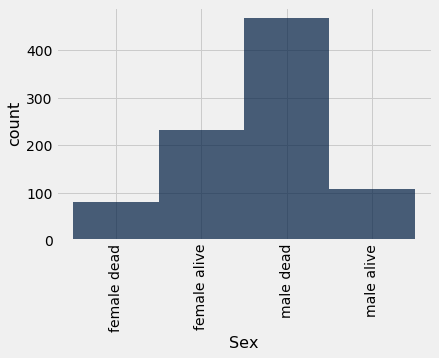

In [12]:
#g. Now that you have some familiarity with the dataset, create two of your own questions and answer them.
Passengers.show(5)
#I think an easy question, yet fairly important to consider is, how many men versus women survived?
#Recall what we did in f. We will apply that same methodology and then determine relative survival rate. That is,
#What percentage of men survived out of all the men aboard...
Sex_Survival=Passengers.groups(['Sex','Survived'])
Sex_Survival.show(5)
#Let's create a bar chart just to practice again. 
import matplotlib.pyplot as plt #actually allows us to use the pyplot commands..
N=4 #Let this be the number of categories
ind=np.arange(N)
Sex_Survival.sort('Sex').bar('Sex','count',align='edge',overlay=False)
plt.xticks(ind, ('female dead','female alive','male dead','male alive'), rotation='vertical')
#Wow, that was aggravating... Now to relative percentage surival
FemaleRate=Sex_Survival.where('Survived',1).where('Sex','female').column('count')/ \
    sum(Sex_Survival.where('Sex','female').column('count'))
MaleRate=Sex_Survival.where('Survived',1).where('Sex','male').column('count')/ \
    sum(Sex_Survival.where('Sex','male').column('count'))
print('Male and female relative survival rates are',MaleRate,',',FemaleRate,' respectively.')

In [19]:
#Now let's apply this to family sizes.
FamilySurvival=Passengers.groups(['family_size','Survived']) #Group based off of family size, then by survival rate
Rates=FamilySurvival.where('Survived',1).column('count')/ \
    sum(FamilySurvival.column('count'))
Rates

array([0.18294052, 0.09988777, 0.06621773, 0.02356902, 0.003367  ,
       0.003367  , 0.00448934])

In [20]:
FamilySurvival.where('Survived',1) #Just for additional reference.

family_size,Survived,count
0,1,163
1,1,89
2,1,59
3,1,21
4,1,3
5,1,3
6,1,4
